# 🤖 Machine Learning

## Introduction


The Titanic dataset is a popular and classic dataset used for introducing machine learning concepts and techniques. This dataset contains information about the passengers aboard the Titanic, including features such as age, gender, ticket class, and whether or not they survived the disaster. The primary objective is to build a predictive model that can accurately classify whether a passenger survived or not based on these features.

Machine learning offers a range of algorithms that can be applied to this classification problem. These algorithms can be broadly categorized into supervised learning techniques, where the model is trained on a labeled dataset. For the Titanic dataset, this means using the known outcomes (survived or not) to train the model.

Key steps in applying machine learning to the Titanic dataset include:

1. **Data Preprocessing:** This involves cleaning the data, handling missing values, and performing feature engineering to create relevant features that will improve the model's performance. The preprocessing steps ensure that the data is in a suitable format for training.

2. **Splitting the Data:** The dataset is typically split into a training set and a test set. The training set is used to train the model, while the test set is used to evaluate its performance.

3. **Selecting and Training Models:** Various machine learning algorithms can be applied to the Titanic dataset, including:
   - **Logistic Regression:** A simple and interpretable algorithm suitable for binary classification problems.
   - **Decision Trees:** A non-linear model that captures complex interactions between features.
   - **Random Forests:** An ensemble method that builds multiple decision trees and combines their predictions for improved accuracy.
   - **Support Vector Machines (SVM):** A powerful classifier that can find the optimal boundary between classes.
   - **Gradient Boosting:** An ensemble technique that builds models sequentially to correct errors made by previous models.

4. **Model Evaluation:** The performance of the models is evaluated using metrics such as accuracy, precision, recall, and the F1 score. Cross-validation techniques can also be employed to ensure the model's robustness and to prevent overfitting.

5. **Hyperparameter Tuning:** This involves optimizing the parameters of the chosen algorithms to improve their performance. Techniques like grid search or random search can be used for this purpose.

6. **Making Predictions:** Once the model is trained and evaluated, it can be used to make predictions on new, unseen data. In the case of the Titanic dataset, this would involve predicting the survival of passengers based on their features.

By applying machine learning techniques to the Titanic dataset, we can gain valuable insights into the factors that influenced survival and develop predictive models that can be used for similar classification tasks in other domains. The process also provides a practical introduction to key machine learning concepts and methods.

## Apply Machine Learning Models

In this section, we will apply various machine learning models to the Titanic dataset to predict passenger survival. By leveraging algorithms such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and Gradient Boosting, we aim to build and evaluate predictive models. These models will help us understand the key factors influencing survival and demonstrate the application of machine learning techniques to real-world data.

In [1]:
# Libraries
from loguru import logger
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import joblib
import time

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    execution_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = round(roc_auc_score(y_test, y_prob), 3)

    evaluation_metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc,
        "Time": round(execution_time, 3),
    }

    return evaluation_metrics



def train_and_evaluate_all_models(models_dict, X_train, y_train, X_test, y_test):
    evaluation_results = {}
    for model_name, model in models_dict.items():
        evaluation_metrics = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test
        )
        evaluation_results[model_name] = evaluation_metrics

    results_df = pd.DataFrame.from_dict(evaluation_results, orient="index")
    return results_df

def preprocess_applier(preprocessor, X_data):
    # Apply preprocessing to the data
    X_data_processed = preprocessor.transform(X_data)

    # Get column names after preprocessing
    numeric_feature_names = preprocessor.transformers_[0][-1]
    categorical_feature_names = preprocessor.transformers_[1][-1]

    # Get the unique categories of the categorical variables
    unique_categories = preprocessor.named_transformers_["cat"]["onehot"].categories_

    # Create column names after OneHotEncoding
    encoded_categorical_feature_names = []
    for i, categories in enumerate(unique_categories):
        for category in categories:
            encoded_categorical_feature_names.append(
                f"{categorical_feature_names[i]}_{category}"
            )

    # Convert the sparse matrix to a Pandas DataFrame
    transformed_df = pd.DataFrame(
        X_data_processed.toarray(),
        columns=numeric_feature_names + encoded_categorical_feature_names,
    )

    return transformed_df

In [3]:
logger.info("Read Data")

# Paths
path_raw = "../../data/raw/"
path_processed = "../../data/processed/"
path_final = "../../data/final/"

# Read data
train = pd.read_csv(path_processed + "train.csv")
test = pd.read_csv(path_processed + "test.csv")

columns_to_convert = ['Pclass', 'SibSp', 'Parch']
train[columns_to_convert] = train[columns_to_convert].astype(str)
test[columns_to_convert] = test[columns_to_convert].astype(str)

# Get column names by data types
target_variable = 'Survived'

float_columns = [x for x in list(train.select_dtypes(include=['float64']).columns) if x != target_variable]
integer_columns = [x for x in list(train.select_dtypes(include=['int32', 'int64']).columns) if x != target_variable]
object_columns = [x for x in list(train.select_dtypes(include=['object']).columns) if x != target_variable]

2024-06-09 20:11:17.992 | INFO     | __main__:<module>:1 - Read Data


In [4]:
logger.info("Split the dataset into training and testing sets")

# Split the dataset into training and testing sets
target = 'Survived'
index_column = 'PassengerId'

features = [x for x in train.columns if x not in [target, index_column]]

X = train[features]
y = train[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example of numeric and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers for numeric and categorical variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer to apply transformations in a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get column names after preprocessing
numeric_feature_names = preprocessor.transformers_[0][-1]
categorical_feature_names = preprocessor.transformers_[1][-1]

# Get the unique categories of the categorical variables
unique_categories = preprocessor.named_transformers_['cat']['onehot'].categories_

# Create column names after OneHotEncoding
encoded_categorical_feature_names = []
for i, categories in enumerate(unique_categories):
    for category in categories:
        encoded_categorical_feature_names.append(f'{categorical_feature_names[i]}_{category}')

# Convert the sparse matrix to a Pandas DataFrame
transformed_train_df = pd.DataFrame(X_train_processed.toarray(), columns=numeric_feature_names + encoded_categorical_feature_names)
transformed_test_df = pd.DataFrame(X_test_processed.toarray(), columns=numeric_feature_names + encoded_categorical_feature_names)

2024-06-09 20:11:18.024 | INFO     | __main__:<module>:1 - Split the dataset into training and testing sets


In [5]:
# Models with optimized hyperparameters

# Initialize RandomForest classifier with optimized hyperparameters
random_forest = RandomForestClassifier(random_state=42,
                                       n_estimators=100,
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1)

# Initialize LGBM classifier with optimized hyperparameters
lgbm = LGBMClassifier(random_state=42,
                      n_estimators=100,
                      learning_rate=0.1,
                      max_depth=-1)

# Initialize DecisionTree classifier with optimized hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42,
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1)

# Initialize KNeighbors classifier with optimized hyperparameters
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2)

# Initialize LogisticRegression classifier with optimized hyperparameters
logistic_regression = LogisticRegression(random_state=42,
                                         C=1.0,
                                         penalty='l2')

# Initialize GaussianNB classifier with optimized hyperparameters
gaussian_nb = GaussianNB(var_smoothing=1e-9)

# Initialize AdaBoost classifier with optimized hyperparameters
ada_boost = AdaBoostClassifier(random_state=42,
                               n_estimators=50,
                               learning_rate=0.1)

# Create a dictionary of models with their parameters for easy iteration
models = {
    'Random Forest': random_forest, 
    'LGBM': lgbm,
    'Decision Tree': decision_tree,
    'KNN': knn, 
    'Logistic Regression': logistic_regression,
    'GaussianNB': gaussian_nb,
    'AdaBoost': ada_boost
}

In [6]:
# Call the function to train and evaluate all models
logger.info("Train and evaluate all models")
results_df = train_and_evaluate_all_models(models, transformed_train_df, y_train, transformed_test_df, y_test)

2024-06-09 20:11:18.067 | INFO     | __main__:<module>:2 - Train and evaluate all models


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [7]:
# Display the DataFrame with the results
logger.info("Sort the results by the AUC metric")
results_df.sort_values('AUC', ascending=False)

2024-06-09 20:11:18.474 | INFO     | __main__:<module>:2 - Sort the results by the AUC metric


,Accuracy,Precision,Recall,F1-Score,AUC,Time
Random Forest,0.810,0.794,0.730,0.761,0.886,0.098
Logistic Regression,0.810,0.786,0.743,0.764,0.875,0.016
KNN,0.821,0.809,0.743,0.775,0.872,0.001
LGBM,0.793,0.768,0.716,0.741,0.871,0.145
AdaBoost,0.788,0.757,0.716,0.736,0.866,0.053
Decision Tree,0.788,0.743,0.743,0.743,0.788,0.004
GaussianNB,0.419,0.415,0.986,0.584,0.778,0.001


**Model Performance Evaluation Results**

The table below presents the performance metrics for various machine learning models applied to the Titanic dataset. The metrics include Accuracy, Precision, Recall, F1-Score, AUC (Area Under the ROC Curve), and the Time taken for training and evaluation. Each metric provides insights into different aspects of model performance.


**Explanation of Metrics:**

- **Accuracy:** The proportion of correctly classified instances among the total instances. A higher value indicates better overall performance.
- **Precision:** The proportion of true positive predictions among all positive predictions. It reflects the model's ability to avoid false positives.
- **Recall:** The proportion of true positive predictions among all actual positives. It indicates the model's ability to capture all relevant instances (sensitivity).
- **F1-Score:** The harmonic mean of precision and recall, providing a balance between the two. It is particularly useful when the class distribution is imbalanced.
- **AUC (Area Under the ROC Curve):** Measures the model's ability to distinguish between classes. A higher AUC value indicates better performance.
- **Time:** The time taken to train and evaluate the model.

**Model Insights:**

1. **Random Forest:** Achieved a high AUC of 0.886, indicating excellent discrimination between classes, with a good balance of precision and recall.
2. **Logistic Regression:** Performed similarly to Random Forest with high accuracy and a strong F1-Score, but slightly lower AUC.
3. **KNN:** Showed the highest accuracy and a strong F1-Score, but with a marginally lower AUC compared to Random Forest and Logistic Regression.
4. **LGBM:** Performed well but with a slightly lower accuracy and AUC than Random Forest, Logistic Regression, and KNN.
5. **AdaBoost:** Had decent performance but was slightly less effective in terms of precision and AUC compared to the top models.
6. **Decision Tree:** Demonstrated good precision and recall but with a significantly lower AUC.
7. **GaussianNB:** Had the lowest performance metrics, indicating poor model performance, especially with a very high recall but low precision and AUC.

**Conclusion:**

Among the models evaluated, the Random Forest, Logistic Regression, and KNN classifiers showed the best overall performance, with high accuracy, precision, recall, F1-Score, and AUC values. Random Forest had the highest AUC, making it the best model for distinguishing between classes. Logistic Regression and KNN also performed well, with KNN achieving the highest accuracy. The time metric indicates that Logistic Regression is the fastest to train and evaluate, followed by KNN, making them efficient choices for quick model training. GaussianNB showed the poorest performance, highlighting its unsuitability for this specific classification task.

## Utilizing the Best Model

In this section, we will focus on leveraging the best-performing machine learning model identified during our evaluation phase. Based on our performance metrics, the Random Forest classifier demonstrated superior results with the highest AUC and a strong balance of precision and recall. We will now utilize this model to make predictions on new data and explore its potential applications. This includes deploying the model, interpreting its predictions, and assessing its real-world impact. By harnessing the power of the best model, we aim to achieve accurate and actionable insights from the Titanic dataset.

In [8]:
logger.info("Select model")

model = RandomForestClassifier(random_state=42)

model.fit(transformed_train_df, y_train)

2024-06-09 20:11:18.489 | INFO     | __main__:<module>:1 - Select model


RandomForestClassifier(random_state=42)

In [9]:
# Get hyperparameters
hyperparameters = model.get_params()
print(hyperparameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [10]:
# Get feature importance
feature_importance = model.feature_importances_

# Get feature names
feature_names = transformed_train_df.columns

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
feature_importance_df.head(10)

,Feature,Importance
0,Age,0.220
1,Fare,0.220
5,Sex_female,0.135
6,Sex_male,0.134
4,Pclass_3,0.044
28,Cabin_N,0.032
3,Pclass_2,0.020
2,Pclass_1,0.020
8,SibSp_1,0.017
32,Embarked_S,0.017


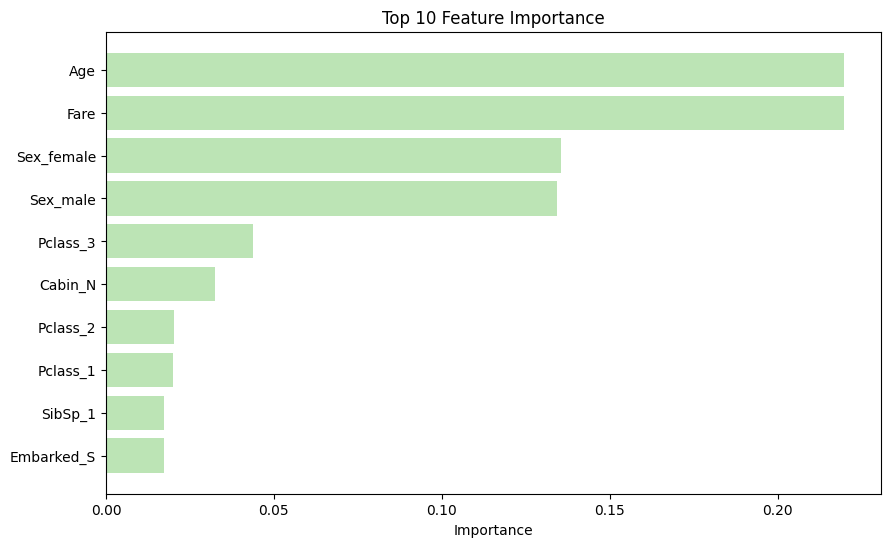

In [11]:
# Bar plot to visualize the most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='#bce4b5')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis so the most important features are at the top
plt.show()

In [12]:
logger.info("Make predictions")

X_test_processed2 = preprocess_applier(preprocessor, test.drop('PassengerId', axis=1))
predictions = model.predict(X_test_processed2)
test["Survived"] = predictions
test.head()

2024-06-09 20:11:18.741 | INFO     | __main__:<module>:1 - Make predictions


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,male,34.500,0,0,7.829,N,Q,0
1,893,3,female,47.000,1,0,7.000,N,S,0
2,894,2,male,62.000,0,0,9.688,N,Q,0
3,895,3,male,27.000,0,0,8.662,N,S,1
4,896,3,female,22.000,1,1,12.287,N,S,0


In [13]:
logger.info("Save Results")

logger.info("Save prediction results")
test.to_csv(path_final + "predictions.csv", index=False, sep=',')

logger.info("Save results of the different models")
results_df.to_csv(path_final + "models_metrics.csv", index=False, sep=',')

2024-06-09 20:11:18.773 | INFO     | __main__:<module>:1 - Save Results
2024-06-09 20:11:18.774 | INFO     | __main__:<module>:3 - Save prediction results
2024-06-09 20:11:18.777 | INFO     | __main__:<module>:6 - Save results of the different models


## Conclusion


Throughout the machine learning phase of our Titanic dataset analysis, we successfully built and evaluated several predictive models to determine passenger survival. The process involved several critical steps:

1. **Data Preprocessing:** We prepared the data by handling missing values, encoding categorical variables, and scaling numerical features. This ensured that our data was clean and suitable for model training.

2. **Model Selection and Training:** We experimented with various machine learning algorithms, including Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), LightGBM, AdaBoost, Decision Tree, and Gaussian Naive Bayes. Each model was trained using optimized hyperparameters to enhance performance.

3. **Evaluation Metrics:** We evaluated the models based on key metrics such as Accuracy, Precision, Recall, F1-Score, and AUC (Area Under the ROC Curve). This comprehensive evaluation allowed us to identify the strengths and weaknesses of each model.

4. **Best Model Identification:** Among the models, the Random Forest classifier emerged as the best-performing model with the highest AUC and a strong balance of precision and recall. This model demonstrated superior ability to distinguish between passengers who survived and those who did not.

5. **Feature Importance:** Using the Random Forest model, we identified the most important features contributing to the prediction of survival. This insight helps in understanding the factors that significantly influenced the survival chances of passengers.

6. **Predictions:** We utilized the best-performing model to make predictions on the test dataset, providing an actionable outcome based on our analysis.

7. **Results Documentation:** Finally, we saved the prediction results and the evaluation metrics of all models. This documentation ensures reproducibility and allows for further analysis and refinement.

Overall, the machine learning phase has provided us with valuable predictive insights and a robust model for assessing passenger survival on the Titanic. The comprehensive approach, from data preprocessing to model evaluation and deployment, underscores the importance of methodical and thorough analysis in achieving accurate and meaningful results.